In [21]:
import numpy as np 

In [22]:
import pandas as pd 

In [23]:
import matplotlib.pyplot as plt

In [24]:
import seaborn as sns

In [25]:
data = pd.read_excel('C:/Users/soojin/Desktop/졸작준비/secom_shap_summary_feature_importance.xlsx')

In [26]:
data

,59,64,140,333,573,152,331,348,2,426,435,16,38,132,210,0,126,562,Pass/Fail
0,-1.7264,21.7264,0.3948,6.5893,0.3157,0.4734,0.0752,0.0215,2187.7333,1.7275,2.7073,10.0433,86.9555,2.2967,0.0772,3030.93,3.353,NaN,-1
1,0.8073,19.1927,0.2301,5.9247,0.2653,0.5666,0.0778,0.0142,2230.4222,1.4857,5.7093,9.2599,87.5241,2.2932,0.0566,3095.78,2.771,NaN,-1
2,23.8245,16.1755,0.3263,5.9453,0.1882,0.4909,0.0243,0.0105,2186.4111,1.8268,5.7650,9.3144,84.7327,2.2592,0.0339,2932.61,3.094,267.064,1
3,24.3791,15.6209,0.1915,6.6262,0.1738,1.3029,0.0243,0.0407,2199.0333,1.5441,5.3899,9.6924,86.6867,2.3802,0.1248,2988.72,2.480,268.228,-1
4,-12.2945,32.2945,0.3744,4.7279,0.2224,0.4434,0.0822,0.0246,2233.3667,1.2943,2.0088,10.3387,86.1468,2.3715,0.0915,3032.24,3.027,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2.8182,17.1818,0.3124,5.7187,0.2363,0.4915,0.0315,NaN,2179.7333,1.6027,8.1372,10.2397,86.3672,2.2886,NaN,2899.41,2.454,264.272,-1
1563,-3.3555,23.3555,0.1119,5.7124,0.3891,0.2046,0.0782,NaN,2198.5667,1.5880,2.3859,10.2285,86.4051,2.2877,NaN,3052.31,2.783,266.832,-1
1564,1.1664,18.8336,0.1071,6.3378,0.4154,NaN,0.0706,NaN,2206.3000,NaN,3.8076,NaN,86.3506,NaN,NaN,2978.81,NaN,256.730,-1
1565,4.4682,15.5318,0.1737,5.9169,0.3669,0.3615,0.0783,NaN,2177.0333,1.0199,9.7082,9.8630,86.3130,2.2604,NaN,2894.92,2.658,264.272,-1


In [27]:
# 결측값을 999로 대체 #결측값 대체 다른 방법으로도 해보기
# np.NaN이 결측값임. 이것을 replace을 사용해서 999로 바꿈
data = data.replace(np.NaN, 999)

# 결측값 정보를 출력
data.isnull().sum()

59           0
64           0
140          0
333          0
573          0
152          0
331          0
348          0
2            0
426          0
435          0
16           0
38           0
132          0
210          0
0            0
126          0
562          0
Pass/Fail    0
dtype: int64

In [28]:
#shap summary plot에서 575, 40은 개별적인 변수 중요성을 보니까 영향이 적을 것 같아서 제외
data

,59,64,140,333,573,152,331,348,2,426,435,16,38,132,210,0,126,562,Pass/Fail
0,-1.7264,21.7264,0.3948,6.5893,0.3157,0.4734,0.0752,0.0215,2187.7333,1.7275,2.7073,10.0433,86.9555,2.2967,0.0772,3030.93,3.353,999.000,-1
1,0.8073,19.1927,0.2301,5.9247,0.2653,0.5666,0.0778,0.0142,2230.4222,1.4857,5.7093,9.2599,87.5241,2.2932,0.0566,3095.78,2.771,999.000,-1
2,23.8245,16.1755,0.3263,5.9453,0.1882,0.4909,0.0243,0.0105,2186.4111,1.8268,5.7650,9.3144,84.7327,2.2592,0.0339,2932.61,3.094,267.064,1
3,24.3791,15.6209,0.1915,6.6262,0.1738,1.3029,0.0243,0.0407,2199.0333,1.5441,5.3899,9.6924,86.6867,2.3802,0.1248,2988.72,2.480,268.228,-1
4,-12.2945,32.2945,0.3744,4.7279,0.2224,0.4434,0.0822,0.0246,2233.3667,1.2943,2.0088,10.3387,86.1468,2.3715,0.0915,3032.24,3.027,999.000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2.8182,17.1818,0.3124,5.7187,0.2363,0.4915,0.0315,999.0000,2179.7333,1.6027,8.1372,10.2397,86.3672,2.2886,999.0000,2899.41,2.454,264.272,-1
1563,-3.3555,23.3555,0.1119,5.7124,0.3891,0.2046,0.0782,999.0000,2198.5667,1.5880,2.3859,10.2285,86.4051,2.2877,999.0000,3052.31,2.783,266.832,-1
1564,1.1664,18.8336,0.1071,6.3378,0.4154,999.0000,0.0706,999.0000,2206.3000,999.0000,3.8076,999.0000,86.3506,999.0000,999.0000,2978.81,999.000,256.730,-1
1565,4.4682,15.5318,0.1737,5.9169,0.3669,0.3615,0.0783,999.0000,2177.0333,1.0199,9.7082,9.8630,86.3130,2.2604,999.0000,2894.92,2.658,264.272,-1


In [29]:
# dataframe의 정보를 요약해서 출력
# info()로 정보를 알 수 있음
# 처음이 행이고 두번째 열
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   59         1567 non-null   float64
 1   64         1567 non-null   float64
 2   140        1567 non-null   float64
 3   333        1567 non-null   float64
 4   573        1567 non-null   float64
 5   152        1567 non-null   float64
 6   331        1567 non-null   float64
 7   348        1567 non-null   float64
 8   2          1567 non-null   float64
 9   426        1567 non-null   float64
 10  435        1567 non-null   float64
 11  16         1567 non-null   float64
 12  38         1567 non-null   float64
 13  132        1567 non-null   float64
 14  210        1567 non-null   float64
 15  0          1567 non-null   float64
 16  126        1567 non-null   float64
 17  562        1567 non-null   float64
 18  Pass/Fail  1567 non-null   int64  
dtypes: float64(18), int64(1)
memory usage: 232.7 KB


(1567, 19)

In [30]:
# 수치형 변수의 데이터 정보를 요약하여 출력
# mean은 평균, std는 표준편차
data.describe()

,59,64,140,333,573,152,331,348,2,426,435,16,38,132,210,0,126,562,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,7.409685,24.913012,34.770252,10.017209,0.345636,3.107014,2.633115,15.324902,2189.812370,3.144067,10.633753,11.801207,87.418685,7.406899,15.388079,3006.735782,8.472645,391.001410,-0.867262
std,67.121530,65.460088,512.893253,61.428029,0.248478,49.482155,50.420686,122.719325,116.853371,43.640551,49.284524,43.316563,23.047282,71.054923,122.711449,144.579459,75.308685,279.440344,0.498010
min,-28.988200,6.448200,0.031900,2.837200,0.066700,0.154400,0.022400,0.010300,999.000000,0.363200,0.000000,4.469600,84.732700,2.191100,0.031900,999.000000,2.340000,242.286000,-1.000000
25%,-1.855450,17.377300,0.131800,5.456600,0.242250,0.373850,0.068800,0.018200,2180.700000,0.744200,3.495000,9.568550,86.578300,2.277300,0.065900,2965.670000,2.574000,262.101000,-1.000000
50%,0.973600,20.044500,0.239300,5.988100,0.293400,0.468800,0.084800,0.022800,2200.955600,1.136400,4.555700,9.852000,86.820700,2.312400,0.080300,3010.920000,2.736000,264.272000,-1.000000
75%,4.412300,22.858650,0.441100,6.556750,0.366900,0.686450,0.096000,0.027700,2218.055500,1.540300,5.826950,10.129950,87.002400,2.359200,0.100300,3056.540000,2.875000,270.705000,-1.000000
max,999.000000,999.000000,9998.894400,999.000000,2.196700,999.000000,999.000000,999.000000,2315.266700,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,3356.350000,999.000000,999.000000,1.000000


-1    1463
 1     104
Name: Pass/Fail, dtype: int64

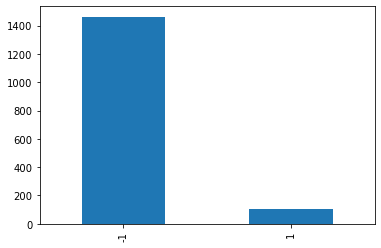

In [31]:
# 분포를 막대 그래프를 사용하여 출력
# pandas 모듈을 plot()를 사용해서 막대그래프를 그림
# value_counts()로 합계를 구함
data['Pass/Fail'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인
data['Pass/Fail'].value_counts()

In [32]:
# 예측해야 할 변수인 `Pass/Fail`를 제거하여 x에 저장.
x = data.drop(columns = ['Pass/Fail'], axis = 1)

# 예측해야 할 변수 `Pass/Fail`만을 선택하여 numpy 형태로 y에 저장.
y = data['Pass/Fail']

# ravel은 "풀다"로 다차원을 1차원으로 푸는 것을 의미.
# 1차원 벡터 형태로 출력하기 위해 ravel 사용. 
y = y.to_numpy().ravel() 
y

array([-1, -1,  1, ..., -1, -1, -1], dtype=int64)

In [33]:
x

,59,64,140,333,573,152,331,348,2,426,435,16,38,132,210,0,126,562
0,-1.7264,21.7264,0.3948,6.5893,0.3157,0.4734,0.0752,0.0215,2187.7333,1.7275,2.7073,10.0433,86.9555,2.2967,0.0772,3030.93,3.353,999.000
1,0.8073,19.1927,0.2301,5.9247,0.2653,0.5666,0.0778,0.0142,2230.4222,1.4857,5.7093,9.2599,87.5241,2.2932,0.0566,3095.78,2.771,999.000
2,23.8245,16.1755,0.3263,5.9453,0.1882,0.4909,0.0243,0.0105,2186.4111,1.8268,5.7650,9.3144,84.7327,2.2592,0.0339,2932.61,3.094,267.064
3,24.3791,15.6209,0.1915,6.6262,0.1738,1.3029,0.0243,0.0407,2199.0333,1.5441,5.3899,9.6924,86.6867,2.3802,0.1248,2988.72,2.480,268.228
4,-12.2945,32.2945,0.3744,4.7279,0.2224,0.4434,0.0822,0.0246,2233.3667,1.2943,2.0088,10.3387,86.1468,2.3715,0.0915,3032.24,3.027,999.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2.8182,17.1818,0.3124,5.7187,0.2363,0.4915,0.0315,999.0000,2179.7333,1.6027,8.1372,10.2397,86.3672,2.2886,999.0000,2899.41,2.454,264.272
1563,-3.3555,23.3555,0.1119,5.7124,0.3891,0.2046,0.0782,999.0000,2198.5667,1.5880,2.3859,10.2285,86.4051,2.2877,999.0000,3052.31,2.783,266.832
1564,1.1664,18.8336,0.1071,6.3378,0.4154,999.0000,0.0706,999.0000,2206.3000,999.0000,3.8076,999.0000,86.3506,999.0000,999.0000,2978.81,999.000,256.730
1565,4.4682,15.5318,0.1737,5.9169,0.3669,0.3615,0.0783,999.0000,2177.0333,1.0199,9.7082,9.8630,86.3130,2.2604,999.0000,2894.92,2.658,264.272


In [34]:
# splitting them into train test and split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# gettiing the shapes
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1096, 18)
shape of x_test:  (471, 18)
shape of y_train:  (1096,)
shape of y_test:  (471,)


In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
model_decision=DecisionTreeClassifier().fit(x_train,y_train)

In [36]:
model_decision.score(x_train,y_train)
model_decision.score(x_test,y_test)

0.881104033970276

In [37]:
model_xgboost=XGBClassifier().fit(x_train,y_train)
model_xgboost.score(x_train,y_train)
model_xgboost.score(x_test,y_test)

[13:08:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\soojin\anacondaa\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9426751592356688

C:\Users\soojin\anacondaa\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

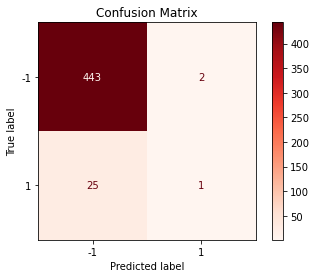

In [38]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

#label=['anger', 'happiness', 'fear', 'sadness', 'neutral'] # 라벨 설정
plot = plot_confusion_matrix(model_xgboost, # 분류 모델
                             x_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             #display_labels=label, # 표에 표시할 labels
                             cmap=plt.cm.Reds, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

C:\Users\soojin\anacondaa\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

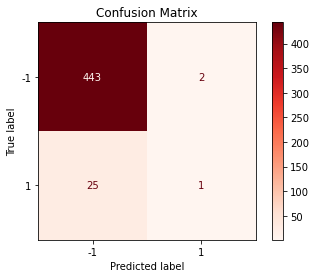

In [39]:
plot = plot_confusion_matrix(model_xgboost, # 분류 모델
                             x_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             #display_labels=label, # 표에 표시할 labels
                             cmap=plt.cm.Reds, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')